In this project, we are focusing on the global warming API (https://global-warming.org/api). We will be analyzing and comparing four characteristics i.e. temperature(at the poles), methane volume, nitrous dioxide volume and co2 volume in the atmosphere to establish that global warming is not a hoax and correlate them for the last decade or so. Data will be called from four different APIs, one each for temperature, co2, nitrous dioxide and methane. These have their own data formats and then we will integrate them together into a single dataframe so that a comparative analysis could be carried out. These datasets have been recorded on different time frames and at different frequencies. We would also have to eliminate out any data which doesn't fall in the common time frame and convert datasets at other frequencies e.g. co2, which was recorded daily has to be converted into a monthly data. One assumption that we have taken here, is that monthly data provided for temperature, methane and nitrous dioxide was recorded on 1st of every month just so that we can have a proper date format for our final dataframe with all the datasets. Also, we didn't consider melted ice cap data because it was recorded yearly and thus its frequency was too small to be compared with the rest of the available data.

### Task 1: Retrieving data from chosen API and parsing it into JSON files

#### Important Note: Some of the cells containing print commands have been commented as the output is really big and raw data, to view it, please uncomment the print command

As always, we start with importing the required modules that would be needed during the course of this assignment.

In [1]:
import requests 
import json
from flask import jsonify
import pandas as pd
import re
from tabulate import tabulate 
import numpy as np
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
result=requests.get('https://global-warming.org/api/temperature-api') # api call for temp data
result.status_code #api status

200

If the above output is an integer then that means that data was successfully retrieved. As was in this case. Now lets take a look at the data.

In [3]:
print((result.json())) #checking the data received

{'error': None, 'result': [{'time': '1880.04', 'station': '-0.21', 'land': '-0.17'}, {'time': '1880.13', 'station': '-0.43', 'land': '-0.23'}, {'time': '1880.21', 'station': '-0.28', 'land': '-0.08'}, {'time': '1880.29', 'station': '-0.49', 'land': '-0.15'}, {'time': '1880.38', 'station': '-0.20', 'land': '-0.08'}, {'time': '1880.46', 'station': '-0.35', 'land': '-0.19'}, {'time': '1880.54', 'station': '-0.29', 'land': '-0.17'}, {'time': '1880.63', 'station': '0.27', 'land': '-0.09'}, {'time': '1880.71', 'station': '-0.34', 'land': '-0.13'}, {'time': '1880.79', 'station': '-0.58', 'land': '-0.22'}, {'time': '1880.88', 'station': '-0.26', 'land': '-0.20'}, {'time': '1880.96', 'station': '-0.25', 'land': '-0.16'}, {'time': '1881.04', 'station': '-0.64', 'land': '-0.18'}, {'time': '1881.13', 'station': '-0.21', 'land': '-0.13'}, {'time': '1881.21', 'station': '-0.09', 'land': '0.04'}, {'time': '1881.29', 'station': '-0.03', 'land': '0.06'}, {'time': '1881.38', 'station': '0.21', 'land': '

This data is very haphzard and unorganized which is common with most API based datasets. We would have to view this in proper format. But before that, lets export it into a file in json format so that it can be accessed later.

In [4]:
with open('tempdata.json', 'w') as outfile: #storing the data in json format
    json.dump(result.json(),outfile)

Once that is taken care of, let us import CO2 level data as well. We will be repeating the same steps and start with an api call and checking the status of the call.

In [5]:
result2=requests.get('https://global-warming.org/api/co2-api') #api call for co2 data
result2.status_code # api status for co2 data

200

The number is 200 which denotes that it was a successful call and data has been stored. Now lets take a look at the raw data so that we can write the coad to view it properly and save it.

In [6]:
#print((result2.json())) #checking the data received

Again, the data is haphzard and unorganized. Let us first export this into json format and then we will view this in proper format.

In [7]:
with open('co2data.json', 'w') as outfile: #storing the data in json format
    json.dump(result2.json(),outfile)

Now that we have stored Carbon dioxide data, we will carry out the same steps for methane api.

In [8]:
result3=requests.get('https://global-warming.org/api/methane-api') #api call for methane data
result3.status_code #api status

200

The number is 200 which denotes that it was a successful call and data has been stored. Now lets take a look at the raw data so that we can write the coad to view it properly and save it.

In [5]:
#print((result3.json())) #checking the data received

Again, the data is haphzard and unorganized. Let us first export this into json format and then we will view this in proper format.

In [10]:
with open('methanedata.json', 'w') as outfile: #storing the received data in json format
    json.dump(result3.json(),outfile)

Again, we repeat the same steps for Nitrous Oxide API. We start with API call and status check. 

In [11]:
result4=requests.get('https://global-warming.org/api/nitrous-oxide-api') #api call for nitrous dioxide 
result4.status_code #api status

200

The number is 200 which denotes that it was a successful call and data has been stored. Now lets take a look at the raw data so that we can write the coad to view it properly and save it.

In [4]:
#print((result4.json())) #checking the received data

Again, the data is haphzard and unorganized. Let us first export this into json format and then we will view this in proper format.

In [13]:
with open('nitrousoxidedata.json', 'w') as outfile: #storing the received data in json format
    json.dump(result4.json(),outfile)

### Task 2: Opening stored JSON files and and data pre-processing (the associated files from the previous task are available in the root directory of this project and can be downloaded and the script can be run from here on out if the website is down)

Now lets open these json files and see if the data has been stored correctly or not. We will write a small code for each each of the dataset to visualize them better based on what we have seen when we tried printing the raw data received from api calls.

In [7]:
# with open('tempdata.json') as json_file: #printing the temperature dataset
#     tempdata = json.load(json_file)
# #print(data)
#     for p in tempdata['result']:
#         print('Time: ' + p['time'])
#         print('Station: ' + p['station'])
#         print('Land: ' + p['land'])
#         print('')

In [15]:
with open('co2data.json') as json_file: #printing the co2 dataset
    co2data = json.load(json_file)
#print(data)
    for p in co2data['co2']:
        print('Year: ' + p['year'])
        print('Month: ' + p['month'])
        print('Day: ' + p['day'])
        print('Cycle: ' + p['cycle'])
        print('Trend: ' + p['trend'])
        print('')

Year: 2011
Month: 1
Day: 1
Cycle: 391.25
Trend: 389.76

Year: 2011
Month: 1
Day: 2
Cycle: 391.29
Trend: 389.77

Year: 2011
Month: 1
Day: 3
Cycle: 391.32
Trend: 389.77

Year: 2011
Month: 1
Day: 4
Cycle: 391.36
Trend: 389.78

Year: 2011
Month: 1
Day: 5
Cycle: 391.39
Trend: 389.79

Year: 2011
Month: 1
Day: 6
Cycle: 391.42
Trend: 389.79

Year: 2011
Month: 1
Day: 7
Cycle: 391.45
Trend: 389.80

Year: 2011
Month: 1
Day: 8
Cycle: 391.48
Trend: 389.80

Year: 2011
Month: 1
Day: 9
Cycle: 391.51
Trend: 389.81

Year: 2011
Month: 1
Day: 10
Cycle: 391.54
Trend: 389.82

Year: 2011
Month: 1
Day: 11
Cycle: 391.57
Trend: 389.82

Year: 2011
Month: 1
Day: 12
Cycle: 391.59
Trend: 389.83

Year: 2011
Month: 1
Day: 13
Cycle: 391.61
Trend: 389.83

Year: 2011
Month: 1
Day: 14
Cycle: 391.64
Trend: 389.84

Year: 2011
Month: 1
Day: 15
Cycle: 391.66
Trend: 389.85

Year: 2011
Month: 1
Day: 16
Cycle: 391.67
Trend: 389.85

Year: 2011
Month: 1
Day: 17
Cycle: 391.69
Trend: 389.86

Year: 2011
Month: 1
Day: 18
Cycle: 391.7

Trend: 390.66

Year: 2011
Month: 6
Day: 10
Cycle: 391.83
Trend: 390.66

Year: 2011
Month: 6
Day: 11
Cycle: 391.79
Trend: 390.67

Year: 2011
Month: 6
Day: 12
Cycle: 391.74
Trend: 390.67

Year: 2011
Month: 6
Day: 13
Cycle: 391.69
Trend: 390.68

Year: 2011
Month: 6
Day: 14
Cycle: 391.64
Trend: 390.68

Year: 2011
Month: 6
Day: 15
Cycle: 391.58
Trend: 390.69

Year: 2011
Month: 6
Day: 16
Cycle: 391.53
Trend: 390.69

Year: 2011
Month: 6
Day: 17
Cycle: 391.47
Trend: 390.70

Year: 2011
Month: 6
Day: 18
Cycle: 391.41
Trend: 390.71

Year: 2011
Month: 6
Day: 19
Cycle: 391.34
Trend: 390.71

Year: 2011
Month: 6
Day: 20
Cycle: 391.28
Trend: 390.72

Year: 2011
Month: 6
Day: 21
Cycle: 391.21
Trend: 390.72

Year: 2011
Month: 6
Day: 22
Cycle: 391.15
Trend: 390.73

Year: 2011
Month: 6
Day: 23
Cycle: 391.08
Trend: 390.73

Year: 2011
Month: 6
Day: 24
Cycle: 391.01
Trend: 390.74

Year: 2011
Month: 6
Day: 25
Cycle: 390.93
Trend: 390.74

Year: 2011
Month: 6
Day: 26
Cycle: 390.86
Trend: 390.75

Year: 2011
Month

Month: 1
Day: 13
Cycle: 393.25
Trend: 391.73

Year: 2012
Month: 1
Day: 14
Cycle: 393.26
Trend: 391.73

Year: 2012
Month: 1
Day: 15
Cycle: 393.27
Trend: 391.74

Year: 2012
Month: 1
Day: 16
Cycle: 393.28
Trend: 391.74

Year: 2012
Month: 1
Day: 17
Cycle: 393.29
Trend: 391.75

Year: 2012
Month: 1
Day: 18
Cycle: 393.30
Trend: 391.75

Year: 2012
Month: 1
Day: 19
Cycle: 393.31
Trend: 391.76

Year: 2012
Month: 1
Day: 20
Cycle: 393.32
Trend: 391.76

Year: 2012
Month: 1
Day: 21
Cycle: 393.33
Trend: 391.77

Year: 2012
Month: 1
Day: 22
Cycle: 393.34
Trend: 391.77

Year: 2012
Month: 1
Day: 23
Cycle: 393.35
Trend: 391.78

Year: 2012
Month: 1
Day: 24
Cycle: 393.36
Trend: 391.78

Year: 2012
Month: 1
Day: 25
Cycle: 393.36
Trend: 391.79

Year: 2012
Month: 1
Day: 26
Cycle: 393.37
Trend: 391.79

Year: 2012
Month: 1
Day: 27
Cycle: 393.38
Trend: 391.80

Year: 2012
Month: 1
Day: 28
Cycle: 393.38
Trend: 391.80

Year: 2012
Month: 1
Day: 29
Cycle: 393.39
Trend: 391.81

Year: 2012
Month: 1
Day: 30
Cycle: 393.39


Cycle: 391.96
Trend: 392.73

Year: 2012
Month: 7
Day: 4
Cycle: 391.87
Trend: 392.74

Year: 2012
Month: 7
Day: 5
Cycle: 391.78
Trend: 392.74

Year: 2012
Month: 7
Day: 6
Cycle: 391.69
Trend: 392.75

Year: 2012
Month: 7
Day: 7
Cycle: 391.60
Trend: 392.76

Year: 2012
Month: 7
Day: 8
Cycle: 391.51
Trend: 392.76

Year: 2012
Month: 7
Day: 9
Cycle: 391.43
Trend: 392.77

Year: 2012
Month: 7
Day: 10
Cycle: 391.34
Trend: 392.78

Year: 2012
Month: 7
Day: 11
Cycle: 391.25
Trend: 392.78

Year: 2012
Month: 7
Day: 12
Cycle: 391.16
Trend: 392.79

Year: 2012
Month: 7
Day: 13
Cycle: 391.07
Trend: 392.80

Year: 2012
Month: 7
Day: 14
Cycle: 390.99
Trend: 392.81

Year: 2012
Month: 7
Day: 15
Cycle: 390.90
Trend: 392.81

Year: 2012
Month: 7
Day: 16
Cycle: 390.82
Trend: 392.82

Year: 2012
Month: 7
Day: 17
Cycle: 390.73
Trend: 392.83

Year: 2012
Month: 7
Day: 18
Cycle: 390.65
Trend: 392.83

Year: 2012
Month: 7
Day: 19
Cycle: 390.57
Trend: 392.84

Year: 2012
Month: 7
Day: 20
Cycle: 390.49
Trend: 392.85

Year: 20

Day: 16
Cycle: 394.81
Trend: 394.03

Year: 2012
Month: 12
Day: 17
Cycle: 394.83
Trend: 394.03

Year: 2012
Month: 12
Day: 18
Cycle: 394.85
Trend: 394.04

Year: 2012
Month: 12
Day: 19
Cycle: 394.87
Trend: 394.05

Year: 2012
Month: 12
Day: 20
Cycle: 394.89
Trend: 394.06

Year: 2012
Month: 12
Day: 21
Cycle: 394.91
Trend: 394.07

Year: 2012
Month: 12
Day: 22
Cycle: 394.92
Trend: 394.08

Year: 2012
Month: 12
Day: 23
Cycle: 394.94
Trend: 394.09

Year: 2012
Month: 12
Day: 24
Cycle: 394.96
Trend: 394.09

Year: 2012
Month: 12
Day: 25
Cycle: 394.98
Trend: 394.10

Year: 2012
Month: 12
Day: 26
Cycle: 395.00
Trend: 394.11

Year: 2012
Month: 12
Day: 27
Cycle: 395.02
Trend: 394.12

Year: 2012
Month: 12
Day: 28
Cycle: 395.04
Trend: 394.13

Year: 2012
Month: 12
Day: 29
Cycle: 395.06
Trend: 394.14

Year: 2012
Month: 12
Day: 30
Cycle: 395.08
Trend: 394.14

Year: 2012
Month: 12
Day: 31
Cycle: 395.10
Trend: 394.15

Year: 2013
Month: 1
Day: 1
Cycle: 395.12
Trend: 394.16

Year: 2013
Month: 1
Day: 2
Cycle: 395


Year: 2013
Month: 7
Day: 21
Cycle: 393.97
Trend: 395.74

Year: 2013
Month: 7
Day: 22
Cycle: 393.91
Trend: 395.75

Year: 2013
Month: 7
Day: 23
Cycle: 393.85
Trend: 395.75

Year: 2013
Month: 7
Day: 24
Cycle: 393.79
Trend: 395.76

Year: 2013
Month: 7
Day: 25
Cycle: 393.73
Trend: 395.77

Year: 2013
Month: 7
Day: 26
Cycle: 393.67
Trend: 395.77

Year: 2013
Month: 7
Day: 27
Cycle: 393.62
Trend: 395.78

Year: 2013
Month: 7
Day: 28
Cycle: 393.56
Trend: 395.79

Year: 2013
Month: 7
Day: 29
Cycle: 393.51
Trend: 395.79

Year: 2013
Month: 7
Day: 30
Cycle: 393.46
Trend: 395.80

Year: 2013
Month: 7
Day: 31
Cycle: 393.41
Trend: 395.81

Year: 2013
Month: 8
Day: 1
Cycle: 393.36
Trend: 395.81

Year: 2013
Month: 8
Day: 2
Cycle: 393.31
Trend: 395.82

Year: 2013
Month: 8
Day: 3
Cycle: 393.27
Trend: 395.83

Year: 2013
Month: 8
Day: 4
Cycle: 393.22
Trend: 395.83

Year: 2013
Month: 8
Day: 5
Cycle: 393.18
Trend: 395.84

Year: 2013
Month: 8
Day: 6
Cycle: 393.14
Trend: 395.85

Year: 2013
Month: 8
Day: 7
Cycle: 39

Day: 28
Cycle: 397.64
Trend: 396.68

Year: 2013
Month: 12
Day: 29
Cycle: 397.66
Trend: 396.69

Year: 2013
Month: 12
Day: 30
Cycle: 397.67
Trend: 396.69

Year: 2013
Month: 12
Day: 31
Cycle: 397.69
Trend: 396.70

Year: 2014
Month: 1
Day: 1
Cycle: 397.70
Trend: 396.70

Year: 2014
Month: 1
Day: 2
Cycle: 397.71
Trend: 396.71

Year: 2014
Month: 1
Day: 3
Cycle: 397.73
Trend: 396.71

Year: 2014
Month: 1
Day: 4
Cycle: 397.74
Trend: 396.72

Year: 2014
Month: 1
Day: 5
Cycle: 397.75
Trend: 396.72

Year: 2014
Month: 1
Day: 6
Cycle: 397.76
Trend: 396.73

Year: 2014
Month: 1
Day: 7
Cycle: 397.78
Trend: 396.73

Year: 2014
Month: 1
Day: 8
Cycle: 397.79
Trend: 396.74

Year: 2014
Month: 1
Day: 9
Cycle: 397.80
Trend: 396.74

Year: 2014
Month: 1
Day: 10
Cycle: 397.81
Trend: 396.75

Year: 2014
Month: 1
Day: 11
Cycle: 397.82
Trend: 396.75

Year: 2014
Month: 1
Day: 12
Cycle: 397.83
Trend: 396.76

Year: 2014
Month: 1
Day: 13
Cycle: 397.84
Trend: 396.76

Year: 2014
Month: 1
Day: 14
Cycle: 397.86
Trend: 396.77



Day: 14
Cycle: 398.79
Trend: 397.52

Year: 2014
Month: 6
Day: 15
Cycle: 398.75
Trend: 397.53

Year: 2014
Month: 6
Day: 16
Cycle: 398.70
Trend: 397.53

Year: 2014
Month: 6
Day: 17
Cycle: 398.66
Trend: 397.54

Year: 2014
Month: 6
Day: 18
Cycle: 398.61
Trend: 397.54

Year: 2014
Month: 6
Day: 19
Cycle: 398.56
Trend: 397.55

Year: 2014
Month: 6
Day: 20
Cycle: 398.51
Trend: 397.55

Year: 2014
Month: 6
Day: 21
Cycle: 398.46
Trend: 397.56

Year: 2014
Month: 6
Day: 22
Cycle: 398.41
Trend: 397.56

Year: 2014
Month: 6
Day: 23
Cycle: 398.35
Trend: 397.57

Year: 2014
Month: 6
Day: 24
Cycle: 398.29
Trend: 397.57

Year: 2014
Month: 6
Day: 25
Cycle: 398.24
Trend: 397.58

Year: 2014
Month: 6
Day: 26
Cycle: 398.18
Trend: 397.58

Year: 2014
Month: 6
Day: 27
Cycle: 398.11
Trend: 397.59

Year: 2014
Month: 6
Day: 28
Cycle: 398.05
Trend: 397.59

Year: 2014
Month: 6
Day: 29
Cycle: 397.99
Trend: 397.60

Year: 2014
Month: 6
Day: 30
Cycle: 397.92
Trend: 397.60

Year: 2014
Month: 7
Day: 1
Cycle: 397.85
Trend: 397

Day: 24
Cycle: 400.22
Trend: 398.70

Year: 2015
Month: 1
Day: 25
Cycle: 400.25
Trend: 398.70

Year: 2015
Month: 1
Day: 26
Cycle: 400.27
Trend: 398.71

Year: 2015
Month: 1
Day: 27
Cycle: 400.29
Trend: 398.71

Year: 2015
Month: 1
Day: 28
Cycle: 400.31
Trend: 398.72

Year: 2015
Month: 1
Day: 29
Cycle: 400.33
Trend: 398.72

Year: 2015
Month: 1
Day: 30
Cycle: 400.35
Trend: 398.73

Year: 2015
Month: 1
Day: 31
Cycle: 400.37
Trend: 398.74

Year: 2015
Month: 2
Day: 1
Cycle: 400.39
Trend: 398.74

Year: 2015
Month: 2
Day: 2
Cycle: 400.41
Trend: 398.75

Year: 2015
Month: 2
Day: 3
Cycle: 400.43
Trend: 398.75

Year: 2015
Month: 2
Day: 4
Cycle: 400.45
Trend: 398.76

Year: 2015
Month: 2
Day: 5
Cycle: 400.47
Trend: 398.76

Year: 2015
Month: 2
Day: 6
Cycle: 400.49
Trend: 398.77

Year: 2015
Month: 2
Day: 7
Cycle: 400.51
Trend: 398.78

Year: 2015
Month: 2
Day: 8
Cycle: 400.52
Trend: 398.78

Year: 2015
Month: 2
Day: 9
Cycle: 400.54
Trend: 398.79

Year: 2015
Month: 2
Day: 10
Cycle: 400.56
Trend: 398.79

Yea

Year: 2015
Month: 7
Day: 25
Cycle: 397.46
Trend: 399.89

Year: 2015
Month: 7
Day: 26
Cycle: 397.41
Trend: 399.90

Year: 2015
Month: 7
Day: 27
Cycle: 397.35
Trend: 399.90

Year: 2015
Month: 7
Day: 28
Cycle: 397.30
Trend: 399.91

Year: 2015
Month: 7
Day: 29
Cycle: 397.24
Trend: 399.92

Year: 2015
Month: 7
Day: 30
Cycle: 397.19
Trend: 399.93

Year: 2015
Month: 7
Day: 31
Cycle: 397.14
Trend: 399.93

Year: 2015
Month: 8
Day: 1
Cycle: 397.10
Trend: 399.94

Year: 2015
Month: 8
Day: 2
Cycle: 397.05
Trend: 399.95

Year: 2015
Month: 8
Day: 3
Cycle: 397.01
Trend: 399.96

Year: 2015
Month: 8
Day: 4
Cycle: 396.96
Trend: 399.96

Year: 2015
Month: 8
Day: 5
Cycle: 396.92
Trend: 399.97

Year: 2015
Month: 8
Day: 6
Cycle: 396.88
Trend: 399.98

Year: 2015
Month: 8
Day: 7
Cycle: 396.85
Trend: 399.99

Year: 2015
Month: 8
Day: 8
Cycle: 396.81
Trend: 400.00

Year: 2015
Month: 8
Day: 9
Cycle: 396.78
Trend: 400.00

Year: 2015
Month: 8
Day: 10
Cycle: 396.75
Trend: 400.01

Year: 2015
Month: 8
Day: 11
Cycle: 396.7

Trend: 401.67

Year: 2016
Month: 2
Day: 9
Cycle: 402.98
Trend: 401.68

Year: 2016
Month: 2
Day: 10
Cycle: 402.99
Trend: 401.69

Year: 2016
Month: 2
Day: 11
Cycle: 403.00
Trend: 401.70

Year: 2016
Month: 2
Day: 12
Cycle: 403.01
Trend: 401.71

Year: 2016
Month: 2
Day: 13
Cycle: 403.03
Trend: 401.72

Year: 2016
Month: 2
Day: 14
Cycle: 403.04
Trend: 401.73

Year: 2016
Month: 2
Day: 15
Cycle: 403.05
Trend: 401.74

Year: 2016
Month: 2
Day: 16
Cycle: 403.07
Trend: 401.75

Year: 2016
Month: 2
Day: 17
Cycle: 403.09
Trend: 401.76

Year: 2016
Month: 2
Day: 18
Cycle: 403.10
Trend: 401.77

Year: 2016
Month: 2
Day: 19
Cycle: 403.12
Trend: 401.78

Year: 2016
Month: 2
Day: 20
Cycle: 403.14
Trend: 401.79

Year: 2016
Month: 2
Day: 21
Cycle: 403.16
Trend: 401.80

Year: 2016
Month: 2
Day: 22
Cycle: 403.17
Trend: 401.81

Year: 2016
Month: 2
Day: 23
Cycle: 403.19
Trend: 401.82

Year: 2016
Month: 2
Day: 24
Cycle: 403.21
Trend: 401.83

Year: 2016
Month: 2
Day: 25
Cycle: 403.24
Trend: 401.84

Year: 2016
Month:

Year: 2016
Month: 10
Day: 3
Cycle: 401.58
Trend: 403.88

Year: 2016
Month: 10
Day: 4
Cycle: 401.65
Trend: 403.88

Year: 2016
Month: 10
Day: 5
Cycle: 401.72
Trend: 403.89

Year: 2016
Month: 10
Day: 6
Cycle: 401.79
Trend: 403.90

Year: 2016
Month: 10
Day: 7
Cycle: 401.85
Trend: 403.91

Year: 2016
Month: 10
Day: 8
Cycle: 401.92
Trend: 403.91

Year: 2016
Month: 10
Day: 9
Cycle: 401.98
Trend: 403.92

Year: 2016
Month: 10
Day: 10
Cycle: 402.05
Trend: 403.93

Year: 2016
Month: 10
Day: 11
Cycle: 402.11
Trend: 403.94

Year: 2016
Month: 10
Day: 12
Cycle: 402.18
Trend: 403.95

Year: 2016
Month: 10
Day: 13
Cycle: 402.24
Trend: 403.95

Year: 2016
Month: 10
Day: 14
Cycle: 402.30
Trend: 403.96

Year: 2016
Month: 10
Day: 15
Cycle: 402.36
Trend: 403.97

Year: 2016
Month: 10
Day: 16
Cycle: 402.42
Trend: 403.98

Year: 2016
Month: 10
Day: 17
Cycle: 402.48
Trend: 403.98

Year: 2016
Month: 10
Day: 18
Cycle: 402.54
Trend: 403.99

Year: 2016
Month: 10
Day: 19
Cycle: 402.59
Trend: 404.00

Year: 2016
Month: 10


Trend: 404.84

Year: 2017
Month: 2
Day: 28
Cycle: 406.73
Trend: 404.84

Year: 2017
Month: 3
Day: 1
Cycle: 406.74
Trend: 404.85

Year: 2017
Month: 3
Day: 2
Cycle: 406.74
Trend: 404.85

Year: 2017
Month: 3
Day: 3
Cycle: 406.74
Trend: 404.86

Year: 2017
Month: 3
Day: 4
Cycle: 406.75
Trend: 404.86

Year: 2017
Month: 3
Day: 5
Cycle: 406.75
Trend: 404.87

Year: 2017
Month: 3
Day: 6
Cycle: 406.75
Trend: 404.88

Year: 2017
Month: 3
Day: 7
Cycle: 406.76
Trend: 404.88

Year: 2017
Month: 3
Day: 8
Cycle: 406.76
Trend: 404.89

Year: 2017
Month: 3
Day: 9
Cycle: 406.76
Trend: 404.89

Year: 2017
Month: 3
Day: 10
Cycle: 406.76
Trend: 404.90

Year: 2017
Month: 3
Day: 11
Cycle: 406.77
Trend: 404.90

Year: 2017
Month: 3
Day: 12
Cycle: 406.77
Trend: 404.91

Year: 2017
Month: 3
Day: 13
Cycle: 406.77
Trend: 404.91

Year: 2017
Month: 3
Day: 14
Cycle: 406.78
Trend: 404.92

Year: 2017
Month: 3
Day: 15
Cycle: 406.78
Trend: 404.92

Year: 2017
Month: 3
Day: 16
Cycle: 406.78
Trend: 404.93

Year: 2017
Month: 3
Day: 

Year: 2017
Month: 8
Day: 17
Cycle: 402.27
Trend: 405.73

Year: 2017
Month: 8
Day: 18
Cycle: 402.24
Trend: 405.73

Year: 2017
Month: 8
Day: 19
Cycle: 402.21
Trend: 405.74

Year: 2017
Month: 8
Day: 20
Cycle: 402.19
Trend: 405.74

Year: 2017
Month: 8
Day: 21
Cycle: 402.16
Trend: 405.75

Year: 2017
Month: 8
Day: 22
Cycle: 402.14
Trend: 405.76

Year: 2017
Month: 8
Day: 23
Cycle: 402.12
Trend: 405.76

Year: 2017
Month: 8
Day: 24
Cycle: 402.11
Trend: 405.77

Year: 2017
Month: 8
Day: 25
Cycle: 402.09
Trend: 405.77

Year: 2017
Month: 8
Day: 26
Cycle: 402.08
Trend: 405.78

Year: 2017
Month: 8
Day: 27
Cycle: 402.07
Trend: 405.78

Year: 2017
Month: 8
Day: 28
Cycle: 402.06
Trend: 405.79

Year: 2017
Month: 8
Day: 29
Cycle: 402.05
Trend: 405.79

Year: 2017
Month: 8
Day: 30
Cycle: 402.05
Trend: 405.80

Year: 2017
Month: 8
Day: 31
Cycle: 402.05
Trend: 405.80

Year: 2017
Month: 9
Day: 1
Cycle: 402.05
Trend: 405.81

Year: 2017
Month: 9
Day: 2
Cycle: 402.05
Trend: 405.81

Year: 2017
Month: 9
Day: 3
Cycle:

Cycle: 409.49
Trend: 407.26

Year: 2018
Month: 4
Day: 30
Cycle: 409.50
Trend: 407.27

Year: 2018
Month: 5
Day: 1
Cycle: 409.51
Trend: 407.27

Year: 2018
Month: 5
Day: 2
Cycle: 409.52
Trend: 407.28

Year: 2018
Month: 5
Day: 3
Cycle: 409.53
Trend: 407.29

Year: 2018
Month: 5
Day: 4
Cycle: 409.54
Trend: 407.29

Year: 2018
Month: 5
Day: 5
Cycle: 409.55
Trend: 407.30

Year: 2018
Month: 5
Day: 6
Cycle: 409.55
Trend: 407.31

Year: 2018
Month: 5
Day: 7
Cycle: 409.56
Trend: 407.31

Year: 2018
Month: 5
Day: 8
Cycle: 409.56
Trend: 407.32

Year: 2018
Month: 5
Day: 9
Cycle: 409.57
Trend: 407.33

Year: 2018
Month: 5
Day: 10
Cycle: 409.57
Trend: 407.33

Year: 2018
Month: 5
Day: 11
Cycle: 409.58
Trend: 407.34

Year: 2018
Month: 5
Day: 12
Cycle: 409.58
Trend: 407.35

Year: 2018
Month: 5
Day: 13
Cycle: 409.58
Trend: 407.35

Year: 2018
Month: 5
Day: 14
Cycle: 409.58
Trend: 407.36

Year: 2018
Month: 5
Day: 15
Cycle: 409.58
Trend: 407.37

Year: 2018
Month: 5
Day: 16
Cycle: 409.58
Trend: 407.37

Year: 2018


Year: 2018
Month: 9
Day: 25
Cycle: 405.09
Trend: 408.26

Year: 2018
Month: 9
Day: 26
Cycle: 405.14
Trend: 408.27

Year: 2018
Month: 9
Day: 27
Cycle: 405.19
Trend: 408.28

Year: 2018
Month: 9
Day: 28
Cycle: 405.25
Trend: 408.28

Year: 2018
Month: 9
Day: 29
Cycle: 405.30
Trend: 408.29

Year: 2018
Month: 9
Day: 30
Cycle: 405.36
Trend: 408.30

Year: 2018
Month: 10
Day: 1
Cycle: 405.42
Trend: 408.30

Year: 2018
Month: 10
Day: 2
Cycle: 405.48
Trend: 408.31

Year: 2018
Month: 10
Day: 3
Cycle: 405.54
Trend: 408.32

Year: 2018
Month: 10
Day: 4
Cycle: 405.60
Trend: 408.32

Year: 2018
Month: 10
Day: 5
Cycle: 405.66
Trend: 408.33

Year: 2018
Month: 10
Day: 6
Cycle: 405.72
Trend: 408.34

Year: 2018
Month: 10
Day: 7
Cycle: 405.79
Trend: 408.35

Year: 2018
Month: 10
Day: 8
Cycle: 405.85
Trend: 408.35

Year: 2018
Month: 10
Day: 9
Cycle: 405.92
Trend: 408.36

Year: 2018
Month: 10
Day: 10
Cycle: 405.98
Trend: 408.37

Year: 2018
Month: 10
Day: 11
Cycle: 406.05
Trend: 408.37

Year: 2018
Month: 10
Day: 12



Year: 2019
Month: 3
Day: 13
Cycle: 411.15
Trend: 409.46

Year: 2019
Month: 3
Day: 14
Cycle: 411.16
Trend: 409.47

Year: 2019
Month: 3
Day: 15
Cycle: 411.17
Trend: 409.47

Year: 2019
Month: 3
Day: 16
Cycle: 411.18
Trend: 409.48

Year: 2019
Month: 3
Day: 17
Cycle: 411.19
Trend: 409.49

Year: 2019
Month: 3
Day: 18
Cycle: 411.20
Trend: 409.50

Year: 2019
Month: 3
Day: 19
Cycle: 411.21
Trend: 409.50

Year: 2019
Month: 3
Day: 20
Cycle: 411.22
Trend: 409.51

Year: 2019
Month: 3
Day: 21
Cycle: 411.23
Trend: 409.52

Year: 2019
Month: 3
Day: 22
Cycle: 411.25
Trend: 409.53

Year: 2019
Month: 3
Day: 23
Cycle: 411.26
Trend: 409.53

Year: 2019
Month: 3
Day: 24
Cycle: 411.27
Trend: 409.54

Year: 2019
Month: 3
Day: 25
Cycle: 411.29
Trend: 409.55

Year: 2019
Month: 3
Day: 26
Cycle: 411.30
Trend: 409.56

Year: 2019
Month: 3
Day: 27
Cycle: 411.31
Trend: 409.56

Year: 2019
Month: 3
Day: 28
Cycle: 411.33
Trend: 409.57

Year: 2019
Month: 3
Day: 29
Cycle: 411.34
Trend: 409.58

Year: 2019
Month: 3
Day: 30
Cy

Cycle: 411.04
Trend: 411.31

Year: 2019
Month: 11
Day: 18
Cycle: 411.09
Trend: 411.31

Year: 2019
Month: 11
Day: 19
Cycle: 411.13
Trend: 411.32

Year: 2019
Month: 11
Day: 20
Cycle: 411.17
Trend: 411.33

Year: 2019
Month: 11
Day: 21
Cycle: 411.22
Trend: 411.33

Year: 2019
Month: 11
Day: 22
Cycle: 411.26
Trend: 411.34

Year: 2019
Month: 11
Day: 23
Cycle: 411.30
Trend: 411.35

Year: 2019
Month: 11
Day: 24
Cycle: 411.34
Trend: 411.36

Year: 2019
Month: 11
Day: 25
Cycle: 411.38
Trend: 411.36

Year: 2019
Month: 11
Day: 26
Cycle: 411.42
Trend: 411.37

Year: 2019
Month: 11
Day: 27
Cycle: 411.46
Trend: 411.38

Year: 2019
Month: 11
Day: 28
Cycle: 411.50
Trend: 411.38

Year: 2019
Month: 11
Day: 29
Cycle: 411.54
Trend: 411.39

Year: 2019
Month: 11
Day: 30
Cycle: 411.58
Trend: 411.40

Year: 2019
Month: 12
Day: 1
Cycle: 411.62
Trend: 411.40

Year: 2019
Month: 12
Day: 2
Cycle: 411.66
Trend: 411.41

Year: 2019
Month: 12
Day: 3
Cycle: 411.70
Trend: 411.42

Year: 2019
Month: 12
Day: 4
Cycle: 411.74
Tren

Cycle: 414.53
Trend: 412.44

Year: 2020
Month: 5
Day: 11
Cycle: 414.53
Trend: 412.45

Year: 2020
Month: 5
Day: 12
Cycle: 414.52
Trend: 412.46

Year: 2020
Month: 5
Day: 13
Cycle: 414.51
Trend: 412.46

Year: 2020
Month: 5
Day: 14
Cycle: 414.51
Trend: 412.47

Year: 2020
Month: 5
Day: 15
Cycle: 414.50
Trend: 412.48

Year: 2020
Month: 5
Day: 16
Cycle: 414.49
Trend: 412.48

Year: 2020
Month: 5
Day: 17
Cycle: 414.48
Trend: 412.49

Year: 2020
Month: 5
Day: 18
Cycle: 414.47
Trend: 412.49

Year: 2020
Month: 5
Day: 19
Cycle: 414.45
Trend: 412.50

Year: 2020
Month: 5
Day: 20
Cycle: 414.44
Trend: 412.51

Year: 2020
Month: 5
Day: 21
Cycle: 414.42
Trend: 412.51

Year: 2020
Month: 5
Day: 22
Cycle: 414.41
Trend: 412.52

Year: 2020
Month: 5
Day: 23
Cycle: 414.39
Trend: 412.52

Year: 2020
Month: 5
Day: 24
Cycle: 414.37
Trend: 412.53

Year: 2020
Month: 5
Day: 25
Cycle: 414.35
Trend: 412.54

Year: 2020
Month: 5
Day: 26
Cycle: 414.33
Trend: 412.54

Year: 2020
Month: 5
Day: 27
Cycle: 414.30
Trend: 412.55

Ye

Day: 17
Cycle: 413.80
Trend: 413.60

Year: 2020
Month: 11
Day: 18
Cycle: 413.83
Trend: 413.61

Year: 2020
Month: 11
Day: 19
Cycle: 413.87
Trend: 413.62

Year: 2020
Month: 11
Day: 20
Cycle: 413.90
Trend: 413.62

Year: 2020
Month: 11
Day: 21
Cycle: 413.93
Trend: 413.63

Year: 2020
Month: 11
Day: 22
Cycle: 413.96
Trend: 413.63

Year: 2020
Month: 11
Day: 23
Cycle: 413.99
Trend: 413.64

Year: 2020
Month: 11
Day: 24
Cycle: 414.02
Trend: 413.65

Year: 2020
Month: 11
Day: 25
Cycle: 414.05
Trend: 413.65

Year: 2020
Month: 11
Day: 26
Cycle: 414.08
Trend: 413.66

Year: 2020
Month: 11
Day: 27
Cycle: 414.11
Trend: 413.67

Year: 2020
Month: 11
Day: 28
Cycle: 414.13
Trend: 413.67

Year: 2020
Month: 11
Day: 29
Cycle: 414.16
Trend: 413.68

Year: 2020
Month: 11
Day: 30
Cycle: 414.18
Trend: 413.69

Year: 2020
Month: 12
Day: 1
Cycle: 414.20
Trend: 413.69

Year: 2020
Month: 12
Day: 2
Cycle: 414.23
Trend: 413.70

Year: 2020
Month: 12
Day: 3
Cycle: 414.25
Trend: 413.70

Year: 2020
Month: 12
Day: 4
Cycle: 414

In [16]:
# with open('methanedata.json') as json_file: #printing the methane dataset
#     methdata = json.load(json_file)
# #print(data)
#     for p in methdata['methane']:
#         print('Date: ' + p['date'])
#         print('Average: ' + p['average'])
#         print('Trend: ' + p['trend'])
#         print('AverageUNC: ' + p['averageUnc'])
#         print('TrendUNC: ' + p['trendUnc'])
#         print('')

Date: 1983.7
Average: 1625.9
Trend: 1634.6
AverageUNC: 2.4
TrendUNC: 1.5

Date: 1983.8
Average: 1628.1
Trend: 1635.3
AverageUNC: 2.9
TrendUNC: 1.4

Date: 1983.9
Average: 1638.4
Trend: 1636.0
AverageUNC: 2.2
TrendUNC: 1.3

Date: 1983.10
Average: 1644.8
Trend: 1636.7
AverageUNC: 1.4
TrendUNC: 1.3

Date: 1983.11
Average: 1642.6
Trend: 1637.5
AverageUNC: 0.8
TrendUNC: 1.2

Date: 1983.12
Average: 1639.4
Trend: 1638.3
AverageUNC: 0.9
TrendUNC: 1.1

Date: 1984.1
Average: 1638.6
Trend: 1639.2
AverageUNC: 1.9
TrendUNC: 1.0

Date: 1984.2
Average: 1638.8
Trend: 1640.1
AverageUNC: 2.0
TrendUNC: 0.9

Date: 1984.3
Average: 1640.7
Trend: 1641.1
AverageUNC: 1.6
TrendUNC: 0.8

Date: 1984.4
Average: 1643.7
Trend: 1642.1
AverageUNC: 1.9
TrendUNC: 0.8

Date: 1984.5
Average: 1642.9
Trend: 1643.1
AverageUNC: 1.1
TrendUNC: 0.7

Date: 1984.6
Average: 1639.6
Trend: 1644.2
AverageUNC: 0.9
TrendUNC: 0.7

Date: 1984.7
Average: 1637.7
Trend: 1645.3
AverageUNC: 1.2
TrendUNC: 0.7

Date: 1984.8
Average: 1641.3
Trend:


Date: 1995.4
Average: 1749.4
Trend: 1747.9
AverageUNC: 0.7
TrendUNC: 0.5

Date: 1995.5
Average: 1747.7
Trend: 1748.3
AverageUNC: 1.0
TrendUNC: 0.5

Date: 1995.6
Average: 1742.8
Trend: 1748.7
AverageUNC: 1.0
TrendUNC: 0.5

Date: 1995.7
Average: 1740.1
Trend: 1749.0
AverageUNC: 0.8
TrendUNC: 0.5

Date: 1995.8
Average: 1743.5
Trend: 1749.2
AverageUNC: 1.1
TrendUNC: 0.5

Date: 1995.9
Average: 1749.7
Trend: 1749.4
AverageUNC: 1.2
TrendUNC: 0.5

Date: 1995.10
Average: 1754.2
Trend: 1749.6
AverageUNC: 0.9
TrendUNC: 0.5

Date: 1995.11
Average: 1755.3
Trend: 1749.8
AverageUNC: 0.8
TrendUNC: 0.5

Date: 1995.12
Average: 1753.7
Trend: 1749.9
AverageUNC: 1.0
TrendUNC: 0.5

Date: 1996.1
Average: 1752.3
Trend: 1750.1
AverageUNC: 1.2
TrendUNC: 0.5

Date: 1996.2
Average: 1752.9
Trend: 1750.3
AverageUNC: 1.2
TrendUNC: 0.6

Date: 1996.3
Average: 1752.2
Trend: 1750.4
AverageUNC: 1.0
TrendUNC: 0.6

Date: 1996.4
Average: 1749.5
Trend: 1750.6
AverageUNC: 1.1
TrendUNC: 0.6

Date: 1996.5
Average: 1748.2
Trend

Average: 1818.6
Trend: 1814.7
AverageUNC: 0.8
TrendUNC: 0.6

Date: 2013.11
Average: 1820.4
Trend: 1815.4
AverageUNC: 0.7
TrendUNC: 0.6

Date: 2013.12
Average: 1819.3
Trend: 1816.1
AverageUNC: 0.8
TrendUNC: 0.6

Date: 2014.1
Average: 1816.9
Trend: 1817.0
AverageUNC: 1.0
TrendUNC: 0.6

Date: 2014.2
Average: 1816.4
Trend: 1817.8
AverageUNC: 1.1
TrendUNC: 0.6

Date: 2014.3
Average: 1818.1
Trend: 1818.8
AverageUNC: 1.2
TrendUNC: 0.6

Date: 2014.4
Average: 1820.9
Trend: 1819.8
AverageUNC: 0.8
TrendUNC: 0.6

Date: 2014.5
Average: 1821.9
Trend: 1820.9
AverageUNC: 0.9
TrendUNC: 0.6

Date: 2014.6
Average: 1818.3
Trend: 1822.0
AverageUNC: 0.8
TrendUNC: 0.6

Date: 2014.7
Average: 1815.6
Trend: 1823.2
AverageUNC: 1.1
TrendUNC: 0.6

Date: 2014.8
Average: 1819.8
Trend: 1824.4
AverageUNC: 1.1
TrendUNC: 0.6

Date: 2014.9
Average: 1826.9
Trend: 1825.5
AverageUNC: 1.0
TrendUNC: 0.5

Date: 2014.10
Average: 1831.2
Trend: 1826.6
AverageUNC: 0.6
TrendUNC: 0.5

Date: 2014.11
Average: 1833.1
Trend: 1827.7
Aver

In [17]:
# with open('nitrousoxidedata.json') as json_file: #printing the nitrous oxide dataset
#     nitrousdata = json.load(json_file)
# #print(data)
#     for p in nitrousdata['nitrous']:
#         print('Date: ' + p['date'])
#         print('Average: ' + p['average'])
#         print('Trend: ' + p['trend'])
#         print('AverageUNC: ' + p['averageUnc'])
#         print('TrendUNC: ' + p['trendUnc'])
#         print('')

Date: 2001.3
Average: 316.2
Trend: 316.2
AverageUNC: 0.2
TrendUNC: 0.1

Date: 2001.4
Average: 316.1
Trend: 316.2
AverageUNC: 0.1
TrendUNC: 0.1

Date: 2001.5
Average: 316.1
Trend: 316.3
AverageUNC: 0.1
TrendUNC: 0.1

Date: 2001.6
Average: 316.2
Trend: 316.3
AverageUNC: 0.1
TrendUNC: 0.1

Date: 2001.7
Average: 316.2
Trend: 316.4
AverageUNC: 0.1
TrendUNC: 0.1

Date: 2001.8
Average: 316.3
Trend: 316.5
AverageUNC: 0.1
TrendUNC: 0.1

Date: 2001.9
Average: 316.4
Trend: 316.5
AverageUNC: 0.1
TrendUNC: 0.1

Date: 2001.10
Average: 316.6
Trend: 316.6
AverageUNC: 0.2
TrendUNC: 0.1

Date: 2001.11
Average: 316.8
Trend: 316.6
AverageUNC: 0.2
TrendUNC: 0.1

Date: 2001.12
Average: 316.9
Trend: 316.7
AverageUNC: 0.2
TrendUNC: 0.1

Date: 2002.1
Average: 316.9
Trend: 316.7
AverageUNC: 0.2
TrendUNC: 0.1

Date: 2002.2
Average: 317.0
Trend: 316.8
AverageUNC: 0.2
TrendUNC: 0.1

Date: 2002.3
Average: 317.0
Trend: 316.8
AverageUNC: 0.2
TrendUNC: 0.1

Date: 2002.4
Average: 316.9
Trend: 316.8
AverageUNC: 0.2
Tren

Average: 325.3
Trend: 325.3
AverageUNC: 0.1
TrendUNC: 0.1

Date: 2012.11
Average: 325.4
Trend: 325.4
AverageUNC: 0.2
TrendUNC: 0.1

Date: 2012.12
Average: 325.5
Trend: 325.4
AverageUNC: 0.2
TrendUNC: 0.1

Date: 2013.1
Average: 325.6
Trend: 325.5
AverageUNC: 0.1
TrendUNC: 0.1

Date: 2013.2
Average: 325.6
Trend: 325.6
AverageUNC: 0.1
TrendUNC: 0.1

Date: 2013.3
Average: 325.7
Trend: 325.6
AverageUNC: 0.1
TrendUNC: 0.1

Date: 2013.4
Average: 325.7
Trend: 325.7
AverageUNC: 0.1
TrendUNC: 0.1

Date: 2013.5
Average: 325.8
Trend: 325.8
AverageUNC: 0.1
TrendUNC: 0.1

Date: 2013.6
Average: 325.9
Trend: 325.9
AverageUNC: 0.2
TrendUNC: 0.1

Date: 2013.7
Average: 326.0
Trend: 326.0
AverageUNC: 0.2
TrendUNC: 0.1

Date: 2013.8
Average: 326.0
Trend: 326.1
AverageUNC: 0.1
TrendUNC: 0.1

Date: 2013.9
Average: 326.0
Trend: 326.1
AverageUNC: 0.1
TrendUNC: 0.1

Date: 2013.10
Average: 326.2
Trend: 326.2
AverageUNC: 0.1
TrendUNC: 0.1

Date: 2013.11
Average: 326.4
Trend: 326.3
AverageUNC: 0.1
TrendUNC: 0.1

D

### Cleaning the individual datasets and then integrating it into a single dataframe

All the data printed above is in dictionaries composed of strings which appear as numeric values. The string data should  be converted into float for analysis and the dictionary would have to be converted into a pandas dataframe. Right now, we will convert all these dictionaries into pandas dataframes first. While we are at it, we will also be splitting the date column into month and year separately. Afterwards, we will assume that this data has been recorded on the first of every month(as mentioned earlier) just to get a proper date column in the YYYY-MM-DD format. Afterwards, we will drop any extra columns present whatsoever for all the four datasets, particularly the separate month and year columns that we created. Another thing that needs to be done is we need to sort out the splitted month column for temperature dataset as in it, months are represented as decimal versions instead of counts i.e .04 represents Jan, .13 represents Feb and so on.

In [18]:
temp_df = pd.json_normalize(tempdata['result']) #converting dictionary to dataframe
temp_df[['Year','Month']] = temp_df.time.str.split(".",expand=True) #splitting month and year
for i in range(len(temp_df['Month'])): #changing the month column from decimals to month numbers
    if temp_df['Month'][i]=='04':
        temp_df['Month'][i]='1'
    elif temp_df['Month'][i]=='13':
        temp_df['Month'][i]='2'
    elif temp_df['Month'][i]=='21':
        temp_df['Month'][i]='3'
    elif temp_df['Month'][i]=='29':
        temp_df['Month'][i]='4'
    elif temp_df['Month'][i]=='38':
        temp_df['Month'][i]='5'
    elif temp_df['Month'][i]=='46':
        temp_df['Month'][i]='6'
    elif temp_df['Month'][i]=='54':
        temp_df['Month'][i]='7'
    elif temp_df['Month'][i]=='63':
        temp_df['Month'][i]='8'
    elif temp_df['Month'][i]=='71':
        temp_df['Month'][i]='9'
    elif temp_df['Month'][i]=='79':
        temp_df['Month'][i]='10'
    elif temp_df['Month'][i]=='88':
        temp_df['Month'][i]='11'
    elif temp_df['Month'][i]=='96':
        temp_df['Month'][i]='12'
temp_df['Year']=pd.to_numeric(temp_df['Year']) #converting year column into integer
temp_df['Month']=pd.to_numeric(temp_df['Month']) #converting month column into integer
temp_df['temp_station']=pd.to_numeric(temp_df['station']) #converting temp_station column into float
temp_df['temp_land']=pd.to_numeric(temp_df['land']) #converting temp_land column into float 
temp_df['date']=pd.to_datetime([f'{y}-{m}-01' for y, m in zip(temp_df.Year, temp_df.Month)]) #making a proper date column in datetime format
del temp_df['time'] #dropping unnecessary columns
del temp_df['Year']
del temp_df['Month']
temp_df=temp_df[['date','temp_station', 'temp_land']] #shaping columns in proper order
print(temp_df) #printing the final temperature dataframe

           date  temp_station  temp_land
0    1880-01-01         -0.21      -0.17
1    1880-02-01         -0.43      -0.23
2    1880-03-01         -0.28      -0.08
3    1880-04-01         -0.49      -0.15
4    1880-05-01         -0.20      -0.08
...         ...           ...        ...
1689 2020-10-01          1.20       0.89
1690 2020-11-01          1.55       1.11
1691 2020-12-01          1.17       0.81
1692 2021-01-01          1.16       0.84
1693 2021-02-01          0.95       0.67

[1694 rows x 3 columns]


Now we carry out the same steps for carbon dioxide dataset

In [19]:
co2_df = pd.json_normalize(co2data['co2']) #converting the dictionary to dataframe
pd.options.mode.chained_assignment = None  #ensuring no warnings appear in our output due to group command used later on in the code
co2_df['co2_cycle']=pd.to_numeric(co2_df['cycle']) #converting co2_cycle value to float from string
co2_df['co2_trend']=pd.to_numeric(co2_df['trend']) #converting co2_trend value to float from string
co2_df['year']=pd.to_numeric(co2_df['year']) # converting year value from string to float 
co2_df['month']=pd.to_numeric(co2_df['month']) #converting the month value from string to float
g = co2_df.groupby(["year", "month"]) #calculating monthly averages from given daily dataset
monthly_averages = g.mean() #taking a mean of given values
co2_df2=monthly_averages #storing the result in a temporary dataframe
year=2011 #initial year from which data was recorded
month=1 #initial month from which data was recorded
co2_df2['year']="" #emptying the year column
co2_df2['month']="" #emptying the month column
for i in range(len(co2_df2)): #for loop for assigning month and year values to the final monthly dataframe
    co2_df2["year"][i]=year
    co2_df2["month"][i]=month
    if month==12: #reset when month count reaches 12
        month=0
        year=year+1
    month=month+1 
co2_df2['date']=pd.to_datetime([f'{y}-{m}-01' for y, m in zip(co2_df2.year, co2_df2.month)]) # converting individual columns to datetime format
del co2_df2['year'] #deleting unnecessary columns
del co2_df2['month']
co2_df=co2_df2[['date','co2_cycle', 'co2_trend']] #ordering the remaining columns
print(co2_df) #printing the final co2 dataset

                 date   co2_cycle   co2_trend
year month                                   
2011 1     2011-01-01  391.620323  389.851935
     2     2011-02-01  391.732857  390.026786
     3     2011-03-01  391.803226  390.196452
     4     2011-04-01  392.254333  390.367000
     5     2011-05-01  392.388710  390.531935
...               ...         ...         ...
2020 11    2020-11-01  413.695000  413.593333
     12    2020-12-01  414.472258  413.788710
2021 1     2021-01-01  415.021290  413.993226
     2     2021-02-01  415.688214  414.192857
     3     2021-03-01  416.121500  414.358000

[123 rows x 3 columns]


In [20]:
methane_df = pd.json_normalize(methdata['methane']) #converting the dictionary to a dataframe
methane_df[['Year','Month']] = methane_df.date.str.split(".",expand=True) #splitting the date column into year and month
methane_df.columns = ['date', 'methane_avg','methane_trend','methane_avgunc','methane_trendunc','Year','Month'] #renaming columns
methane_df['Month']=pd.to_numeric(methane_df['Month']) #converting from string
methane_df['Year']=pd.to_numeric(methane_df['Year']) #converting from string
methane_df['methane_avg']=pd.to_numeric(methane_df['methane_avg']) #converting from string
methane_df['methane_trend']=pd.to_numeric(methane_df['methane_trend']) #converting from string
methane_df['methane_avgunc']=pd.to_numeric(methane_df['methane_avgunc']) #converting from string
methane_df['methane_trendunc']=pd.to_numeric(methane_df['methane_trendunc']) #converting from string
methane_df['date']=pd.to_datetime([f'{y}-{m}-01' for y, m in zip(methane_df.Year, methane_df.Month)]) #creating datetime format column
del methane_df['Year'] #dropping columns that arent needed
del methane_df['Month']
print(methane_df) #printing final mehtane dataset

          date  methane_avg  methane_trend  methane_avgunc  methane_trendunc
0   1983-07-01       1625.9         1634.6             2.4               1.5
1   1983-08-01       1628.1         1635.3             2.9               1.4
2   1983-09-01       1638.4         1636.0             2.2               1.3
3   1983-10-01       1644.8         1636.7             1.4               1.3
4   1983-11-01       1642.6         1637.5             0.8               1.2
..         ...          ...            ...             ...               ...
444 2020-07-01       1871.5         1880.9            -9.9              -9.9
445 2020-08-01       1876.5         1882.7            -9.9              -9.9
446 2020-09-01       1884.8         1884.4            -9.9              -9.9
447 2020-10-01       1890.6         1886.0            -9.9              -9.9
448 2020-11-01       1891.9         1887.6            -9.9              -9.9

[449 rows x 5 columns]


We renamed a few of the columns in methane and nitrous dataframe because they both had the same names and that would have proven to be aproblem when we finally integrated those two datasets.

In [21]:
nitrous_df = pd.json_normalize(nitrousdata['nitrous']) #converting the dictionary to a dataframe
nitrous_df[['Year','Month']] = nitrous_df.date.str.split(".",expand=True) #splitting the date column into year and month
nitrous_df.columns = ['date', 'nitrous_avg','nitrous_trend','nitrous_avgunc','nitrous_trendunc','Year','Month'] #renaming columns
nitrous_df['Month']=pd.to_numeric(nitrous_df['Month']) #converting from string
nitrous_df['Year']=pd.to_numeric(nitrous_df['Year']) #converting from string
nitrous_df['nitrous_avg']=pd.to_numeric(nitrous_df['nitrous_avg']) #converting from string
nitrous_df['nitrous_trend']=pd.to_numeric(nitrous_df['nitrous_trend']) #converting from string
nitrous_df['nitrous_avgunc']=pd.to_numeric(nitrous_df['nitrous_avgunc']) #converting from string
nitrous_df['nitrous_trendunc']=pd.to_numeric(nitrous_df['nitrous_trendunc']) #converting from string
nitrous_df['date']=pd.to_datetime([f'{y}-{m}-01' for y, m in zip(nitrous_df.Year, nitrous_df.Month)]) #creating datetime format column
del nitrous_df['Year'] #dropping columns that arent needed
del nitrous_df['Month']
print(nitrous_df) #printing final nitrous dataset

          date  nitrous_avg  nitrous_trend  nitrous_avgunc  nitrous_trendunc
0   2001-03-01        316.2          316.2             0.2               0.1
1   2001-04-01        316.1          316.2             0.1               0.1
2   2001-05-01        316.1          316.3             0.1               0.1
3   2001-06-01        316.2          316.3             0.1               0.1
4   2001-07-01        316.2          316.4             0.1               0.1
..         ...          ...            ...             ...               ...
232 2020-07-01        333.0          333.1            -9.9              -9.9
233 2020-08-01        333.2          333.2            -9.9              -9.9
234 2020-09-01        333.3          333.4            -9.9              -9.9
235 2020-10-01        333.4          333.5            -9.9              -9.9
236 2020-11-01        333.6          333.6            -9.9              -9.9

[237 rows x 5 columns]


Now, we will try to integrate these dataframes into a single dataframe

In [22]:
main_df1=pd.merge(nitrous_df, methane_df, on=['date']) #combining nitrous and methane dataframes
main_df2=pd.merge(temp_df, co2_df, on=['date']) #combining temperature and carbon dioxide dataframes
main_df=pd.merge(main_df1, temp_df, on=['date']) #combining nitrous, methane and temperature datasets
main_df=pd.merge(main_df, co2_df, on=['date']) #creating the final dataframe
main_df = main_df.sort_values(by=['date']) # reorder the data by date
display(main_df) #display the final dataframe
#the beauty of using pd.merge command is that when we set date as the key, it automatically eliminates non common data in the dataframes being merged

,date,nitrous_avg,nitrous_trend,nitrous_avgunc,nitrous_trendunc,methane_avg,methane_trend,methane_avgunc,methane_trendunc,temp_station,temp_land,co2_cycle,co2_trend
0,2011-01-01,324.0,323.8,0.1,0.1,1800.4,1801.2,1.1,0.8,0.76,0.52,391.620323,389.851935
1,2011-02-01,324.1,323.9,0.1,0.1,1800.2,1801.6,0.9,0.7,0.60,0.48,391.732857,390.026786
2,2011-03-01,324.1,324.0,0.1,0.1,1800.9,1802.0,0.7,0.7,0.76,0.65,391.803226,390.196452
3,2011-04-01,324.1,324.0,0.1,0.1,1802.8,1802.4,0.9,0.7,0.81,0.65,392.254333,390.367000
4,2011-05-01,324.1,324.1,0.1,0.1,1803.3,1802.8,1.0,0.7,0.63,0.53,392.388710,390.531935
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2020-07-01,333.0,333.1,-9.9,-9.9,1871.5,1880.9,-9.9,-9.9,1.07,0.90,411.126452,412.846129
115,2020-08-01,333.2,333.2,-9.9,-9.9,1876.5,1882.7,-9.9,-9.9,1.05,0.87,409.290968,413.031935
116,2020-09-01,333.3,333.4,-9.9,-9.9,1884.8,1884.4,-9.9,-9.9,1.33,0.99,409.877667,413.215333
117,2020-10-01,333.4,333.5,-9.9,-9.9,1890.6,1886.0,-9.9,-9.9,1.20,0.89,411.982581,413.402581


Let us just confirm that there are no missing cells in this table or any strings before we start analyzing the data.

In [23]:
main_df.isnull().sum() # no missing values in the reduced dataset 

date                0
nitrous_avg         0
nitrous_trend       0
nitrous_avgunc      0
nitrous_trendunc    0
methane_avg         0
methane_trend       0
methane_avgunc      0
methane_trendunc    0
temp_station        0
temp_land           0
co2_cycle           0
co2_trend           0
dtype: int64

In [24]:
main_df.dtypes.value_counts()  

float64           12
datetime64[ns]     1
dtype: int64

There's no Null's in the data, there's also no strings either, this means there's therefore no values in it such as "Not Available".

Both of these are highly indicative that all values are present.

### Analyzing and visualizing the cleaned dataset

In [25]:
main_df.describe() #basic statistics on each of the columns of the final dataframes

,nitrous_avg,nitrous_trend,nitrous_avgunc,nitrous_trendunc,methane_avg,methane_trend,methane_avgunc,methane_trendunc,temp_station,temp_land,co2_cycle,co2_trend
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,328.460504,328.461345,-0.698319,-0.722689,1837.331933,1837.447059,0.124370,-0.248739,1.061176,0.840336,401.474975,401.467548
std,2.797100,2.802484,2.799303,2.791738,24.914171,24.535729,3.057665,2.936701,0.245078,0.188895,7.270046,7.115437
min,324.000000,323.800000,-9.900000,-9.900000,1796.100000,1801.200000,-9.900000,-9.900000,0.600000,0.480000,387.526452,389.851935
25%,325.950000,325.950000,0.100000,0.100000,1814.450000,1812.900000,0.800000,0.600000,0.870000,0.705000,395.153710,395.597253
50%,328.800000,328.600000,0.100000,0.100000,1837.800000,1838.900000,1.000000,0.600000,1.050000,0.830000,401.359000,401.142903
75%,330.700000,330.850000,0.200000,0.100000,1856.700000,1856.800000,1.100000,0.700000,1.230000,0.940000,407.551215,407.474946
max,333.600000,333.600000,0.200000,0.200000,1891.900000,1887.600000,1.700000,0.800000,1.700000,1.370000,414.443871,413.593333


All the statistics appear to be on an increasing trend. We will plot individual and comparative plots to better analyze the data. In case of comparative plots, we will be using biaxial plots as these values vary in distinct ranges which are very far from each other. This fact has been established first and then we have plotted biaxially along Y axis/

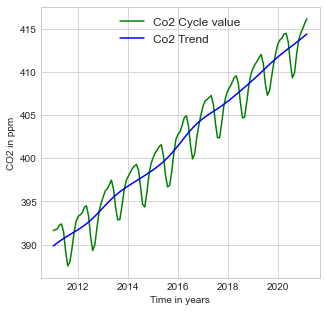

In [26]:
#plotting co2 dataframe
fig, ax1 = plt.subplots(figsize=(5,5)) #defining plot size
ax1.plot(co2_df.date, co2_df.co2_cycle, 'g-',label='Co2 Cycle value') #plotting co2 cycle values
ax1.plot(co2_df.date, co2_df.co2_trend, 'b-',label='Co2 Trend') #plotting co2 trend
ax1.set_xlabel('Time in years') #xlabel
ax1.set_ylabel('CO2 in ppm') #ylabel
ax1.legend(loc='upper center',fontsize='large') #legend
plt.show()

The API didn't provide a very large scale data for Co2, so the information is very limited and only available since 2011. Carbond dioxide in the atmosphere goes through heavy fluctations apparently and yet, if we look at the broader picture, its trendline is almost a straight line passing through the center having a derivative of almost 1, which should be very alarming.

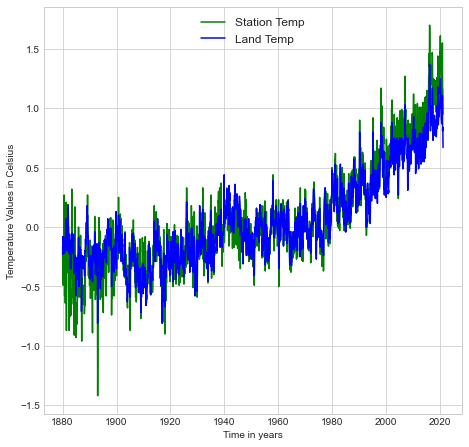

In [27]:
#plotting temperature dataframe
fig, ax1 = plt.subplots(figsize=(7.5,7.5)) #defining plot size
ax1.plot(temp_df.date, temp_df.temp_station, 'g-',label='Station Temp') #plotting station temperature
ax1.plot(temp_df.date, temp_df.temp_land, 'b-',label='Land Temp') #plotting land temperature
ax1.set_xlabel('Time in years') #xlabel
ax1.set_ylabel('Temperature Values in Celsius') #ylabel
ax1.legend(loc='upper center',fontsize='large') #legend
plt.show()

Key takeaway from this plot is that temperature of station has significantly more variations compared to temperature of the land. Another thing to note is that there was a drastic drop in temperature 1886. But overall the temperature has increased significantly especially after 1960s.

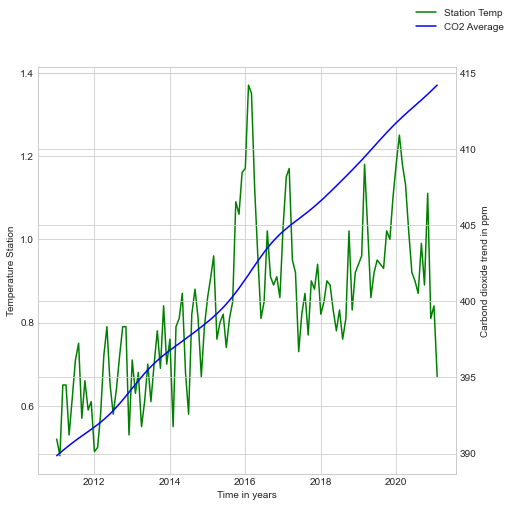

In [28]:
fig, ax1 = plt.subplots(figsize=(7.5,7.5)) #defining figure size
ax2=ax1.twinx() #biaxial plot along y for temperature and carbon dioxide comparison
ax1.plot(main_df2.date, main_df2.temp_land, 'g-',label='Station Temp') #plotting temperature
ax2.plot(main_df2.date, main_df2.co2_trend, 'b-',label='CO2 Average') #plotting carbon dioxide
ax1.set_xlabel('Time in years') #x label
ax1.set_ylabel('Temperature Station') #first y label
ax2.set_ylabel('Carbond dioxide trend in ppm') #second y label
fig.legend() #legend
plt.show()

Key takeaway from this plot is that carbon dioxide trend as discussed earlier was constantly increasing, whereas the the temperature is way more unstable. It peaked around 2016 and then dropped a little and relatively stabilized for a while until 2019 when it increased again. Afterwards, it dropped in huge amounts in the latter half of 2020 which could be credited to the lockdown and limited effects of human activities on the environment.

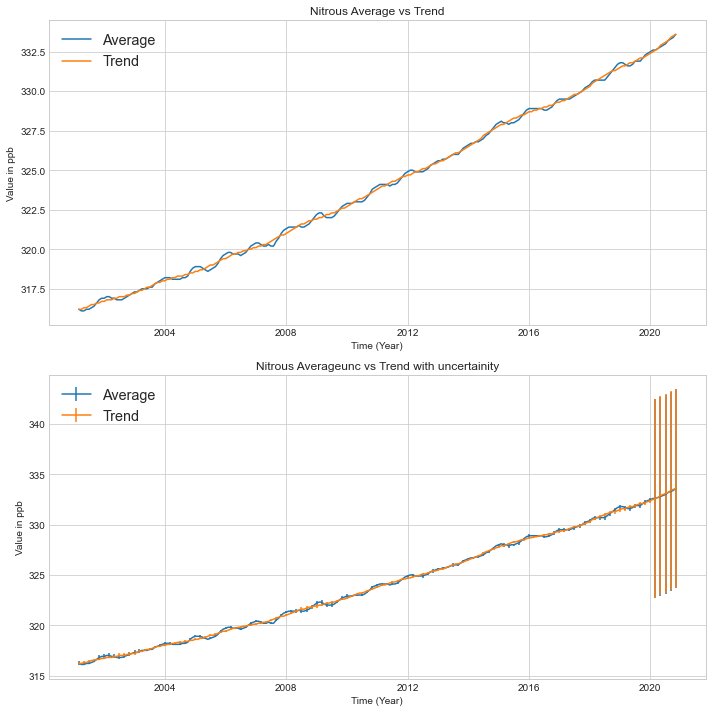

In [29]:
#individual nitrous plots
fig = plt.figure(figsize=(10,10)) #defining figure size
ax1 = fig.add_subplot(2, 1, 1)  #subplot 1
ax2 = fig.add_subplot(2, 1, 2) #subplot 2
ax1.plot(nitrous_df.date,nitrous_df.nitrous_avg, label='Average') 
#plotting nitrous avg vs nitrous trend without uncertainity
ax1.plot(nitrous_df.date,nitrous_df.nitrous_trend, label='Trend')
ax2.errorbar(nitrous_df.date,nitrous_df.nitrous_avg, yerr=nitrous_df.nitrous_avgunc, errorevery=2,label='Average'); 
#plotting nitrous avg vs nitrous trend with uncertainity
ax2.errorbar(nitrous_df.date,nitrous_df.nitrous_trend, yerr=nitrous_df.nitrous_trendunc, errorevery=2,label='Trend'); 
#we are plotting uncertainity for alternate data points for bettter visualization
#setting labels, titles and legends for both subplots
ax1.set_xlabel('Time (Year)') 
ax1.set_ylabel('Value in ppb')
ax1.set_title('Nitrous Average vs Trend')
ax1.legend(loc='upper left',fontsize='x-large')
ax2.set_xlabel('Time (Year)')
ax2.set_ylabel('Value in ppb')
ax2.set_title('Nitrous Averageunc vs Trend with uncertainity')
ax2.legend(loc='upper left',fontsize='x-large')
fig.tight_layout()
plt.show()

Key takeaway: Again, the data is increasing over time and in 2020 uncertainty increased as the recording of data must have been affected by the covid lockdowns. But the steady increase observed here is alarming as well. Average values have very minor fluctuations but relatively they are a lot more stable compared to temperature or carbon dioxide values.

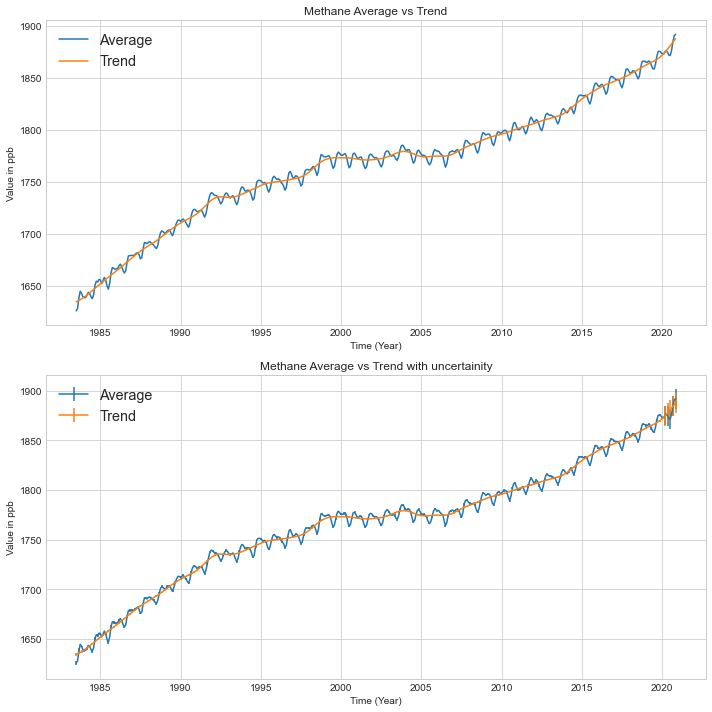

In [30]:
# individual methane plots
fig = plt.figure(figsize=(10,10)) #defining figure size
ax1 = fig.add_subplot(2, 1, 1)  #subplot 1
ax2 = fig.add_subplot(2, 1, 2) #subplot 2
#plotting without uncertainity in subplot 1
ax1.plot(methane_df.date,methane_df.methane_avg, label='Average')
ax1.plot(methane_df.date,methane_df.methane_trend, label='Trend')
#plotting with uncertainity in subplot 2
ax2.errorbar(methane_df.date,methane_df.methane_avg, yerr=methane_df.methane_avgunc, errorevery=2,label='Average');
#uncertainity has been plotted alternately for better visualization
ax2.errorbar(methane_df.date,methane_df.methane_trend, yerr=methane_df.methane_trendunc, errorevery=2,label='Trend');
#setting up legends, titles and labels
ax1.set_xlabel('Time (Year)')
ax1.set_ylabel('Value in ppb')
ax1.set_title('Methane Average vs Trend')
ax1.legend(loc='upper left',fontsize='x-large')
ax2.set_xlabel('Time (Year)')
ax2.set_ylabel('Value in ppb')
ax2.set_title('Methane Average vs Trend with uncertainity')
ax2.legend(loc='upper left',fontsize='x-large')
fig.tight_layout()
plt.show()

Key takeway: The plots clearly show that the most massive spike has been observed in Methane among all the parameters considered. Within last 40-50 years it has jumped from 1650 to 1900. Another key takeaway is that this massive spike has reduced the effect of increased uncertainity due to covid lockdowns. Although the horizontal lines post covid can be observed, they are very small if compared to methane plot described previously.Another point to note is that methane has been relatively unstable with a curved trendline and average values have been high and low throughout although increasing nonetheless.

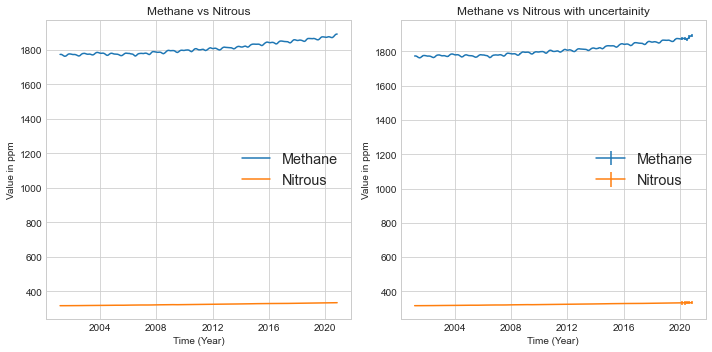

In [31]:
#comparative plot between methane and nitrous average
fig = plt.figure(figsize=(10,5)) #figure sizes
ax1 = fig.add_subplot(1, 2, 1) #subplot 1 for comparison of average values
ax2 = fig.add_subplot(1, 2, 2) #subplot 2 for comparison of average values with uncertainity
ax1.plot(main_df1.date,main_df1.methane_avg, label='Methane')
ax1.plot(main_df1.date,main_df1.nitrous_avg, label='Nitrous')
ax2.errorbar(main_df1.date,main_df1.methane_avg, yerr=main_df1.methane_avgunc, errorevery=2,label='Methane');
ax2.errorbar(main_df1.date,main_df1.nitrous_avg, yerr=main_df1.nitrous_avgunc, errorevery=2,label='Nitrous');
#setting up labels
ax1.set_xlabel('Time (Year)')
ax1.set_ylabel('Value in ppm')
ax1.set_title('Methane vs Nitrous')
ax1.legend(loc='center right',fontsize='x-large')
ax2.set_xlabel('Time (Year)')
ax2.set_ylabel('Value in ppm')
ax2.set_title('Methane vs Nitrous with uncertainity')
ax2.legend(loc='center right',fontsize='x-large')
fig.tight_layout()
plt.show()

It is difficult to compare the nitrous values with methane values except for the fact that they are vary far apart in terms of range. The increase of Nitrous is almost negligible compared to the increase of Methane. Let us try to use a biaxial plot so that we can compare the relative fluctations with each other.

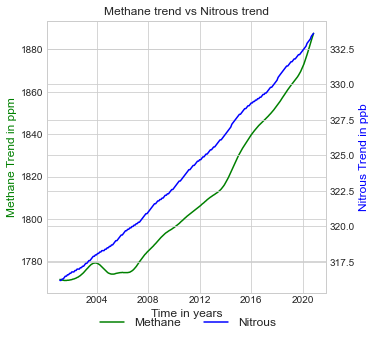

In [32]:
#biaxial comparative plot for nitrous vs methane
fig, ax1 = plt.subplots(figsize=(5,5)) #plot size
ax2 = ax1.twinx() #second axis for nitrous
ax1.plot(main_df1.date, main_df1.methane_trend, 'g-',label= 'Methane') #plotting methane along left
ax2.plot(main_df1.date, main_df1.nitrous_trend, 'b-',label='Nitrous') #plotting nitrous along right
#setting up labels and legends
ax1.set_xlabel('Time in years',fontsize='large') 
ax2.set_title('Methane trend vs Nitrous trend',fontsize='large')
ax1.set_ylabel('Methane Trend in ppm', color='g',fontsize='large')
ax2.set_ylabel('Nitrous Trend in ppb', color='b',fontsize='large')
fig.legend(frameon=False, loc='lower center', ncol=2,fontsize='large')
plt.show()

Methane info is available since 2000 whereas nitrous is available since 1986. Thus, this plot also starts from 2000. Although these two have very similar pattern, a significant difference is the local maxima for methane around 2004 which couldn't have been detected earlier as the peak appeared insignificant when data was plotted from 1986 to 2020. 

#### Scatter plots of various dataframes

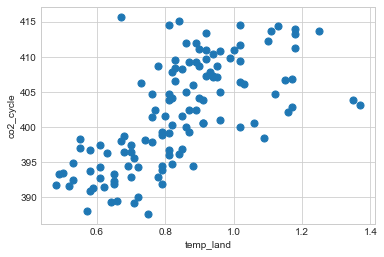

In [33]:
main_df2.plot.scatter(x="temp_land", y="co2_cycle", s=50 )

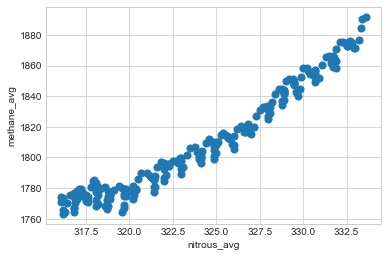

In [34]:
main_df1.plot.scatter(x="nitrous_avg", y="methane_avg", s=50 )

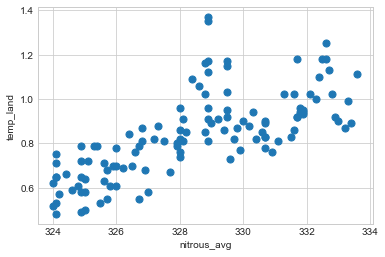

In [35]:
main_df.plot.scatter(x="nitrous_avg", y="temp_land", s=50 )

Although all these scatter plots confirm our hypothesis that all these parameters have high correlation, it would take a lot of time and effort trying to plot them individually one by one. So let us plot them in just one go and then we draw our final conclusions for this exercise.

In [36]:
#deleting unnecessary columns
del main_df['nitrous_avgunc'] 
del main_df['nitrous_trendunc'] 
del main_df['methane_avgunc'] 
del main_df['methane_trendunc'] 

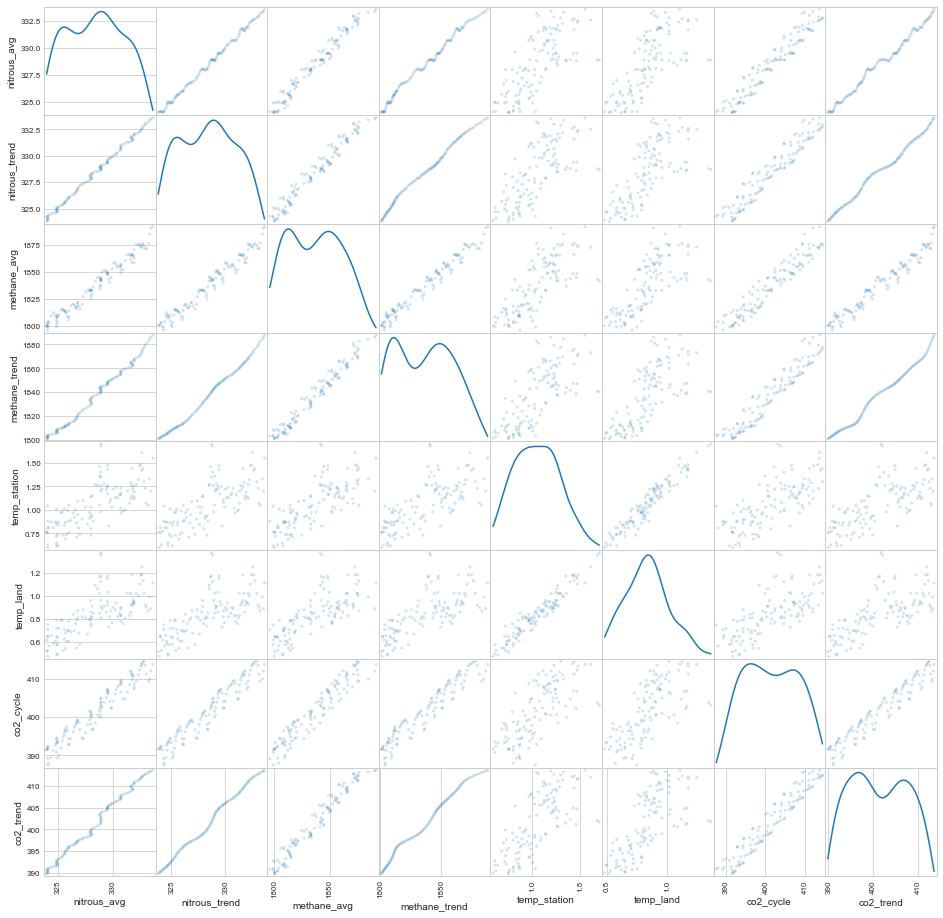

In [37]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(main_df, alpha=0.2, figsize=(16,16), grid= True,diagonal='kde')
plt.show()

#### Final Conclusion and future work

From the final 8x8 set of graphs, it is very evident that all the parameters are highly correlating, some more than other. For instnace, co2 trend and nitrous trend are almost identical whereas, land temperatures and nitrous trend are not as identical, but they still show high amounts of correlation. Further in depth studies like T test and Anova can be carried out the quantify the amount of similarity between these parameters. Another way to quantify it could be the Pearson's correlation coefficient. The data provided by the different APIs have different time frames and was much shorter especially in case of carbon dioxide data which was available only since 2011. More carbon dioxide data would mean a comparative analysis could be carried out on a much longer common time frame. But so far, from all these plots and tables, the conclusion remains the same. All these parameters are increasing with time at an alarming rate and we should consider ways to curb their growth immediately and urgently. Some parameters were more unstable than others, but on the broader picture their trends appear just the same. The most prominent point to raise for future work is: 1) more co2 data is needed to analyse on a broader time frame. 2) Various other statistical techniques and neural networks can be used for prediction and correlation between these parameters. Currently, t

##### Note for viewer : So far, I have tested this notebook over a decent period, it seems to be working just fine. Still, if there is an issue, as mentioned earlier, I would be uploading the JSON files stored in Task 1 along with this notebook and this notebook should run fine from task 2. Otherwise, even the code for task 1 should run just fine i.e. the entire notebook can be run in one go. The last date on which I checked this project to be functional was March 22, 2021.